# Regression Analysis Notebook #

### This notebook contains a regression analysis project.  I approached situation from a new construction perspective. I wanted to know what type of houses I should build.  How much living space should the house have?  How many bathrooms and bedrooms I should have?  What grade of construction should I pursue?  What price range should I consider?  I want to build based on what has been selling based on the data I have. I used kc_house_data.csv for my project. My data set has 21,600 lines ###


### I examined the Squarfoot Living to price through a visual.  Please see 'pricetosqftliving.png in the images folder.  My next step was to find out how many bedrooms did most of houses sold had and also how did the bedrooms relate to price of the house.  I looked at the visuals pricetobedrooms.png and bedroomscount.png graph in the visuals section below or in the images folder.  I reviewed to see if the number of bathrooms and house price has any linear relationship, but once again the variance is not explained by the number of bathrooms.  Bathrooms have a slightly better relationship than with the bedrooms.  Please see priceto bathrooms.png and bathroomscount.png Grade has a better relationship with price compared to bathrooms.  For grading visuals, please see Gradecount.png and pricetgrade.png.  Finally, I wanted to see what Frequency distribution of the house sales on a prince range basis.    

### In my base model, I included all the variable except Id, zipcode, and data.  What I missed during my EDA was the number of floors influence on the price.  My R2 for this base model is .638. ###

### In my second model, I included same as the first medal, but I created  an additional column for Square_feet_Living/Bedrooms.  My Rs for this model was .647. ###

### In my third model, I included same as the first, but I created  an additional column for Square_feet_Living/Bathrooms.  My Rs for this model was .641. ###

### In my 4th model, I included the sames as the first model but ran a polynomial to the second degree and my R2 is .705.

### In conclusion, I want to include the features that sell the houses quickly and provide a good profit.  I want to build houses in the 2500 to 3000 Square feet which includes 1-2 floors, 2+ bathrooms and 3-4 bedrooms in the $350,000 to $650,000 range with a grade of 7 throug 9. 

In [1]:
import pandas as pd
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [320]:
!pwd


/Users/ushamenta/Documents/mod2project/dsc-mod-2-project-v2-1-chicago-ds-012720


In [2]:
data = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning #

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape


(21597, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
data['view'] = data['view'].fillna(0)

In [7]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [8]:
data['waterfront'] = data['waterfront'].fillna(0)

In [9]:
def square_ft_basement(row):
    if row['sqft_basement'] == '?':
        sb = row['sqft_living'] - row['sqft_above']
        return sb
        
    else:
        return row['sqft_basement']

In [10]:
data['sqft_basement'] = data.apply(square_ft_basement, axis=1)

In [11]:
data['sqft_basement']=data['sqft_basement'].astype(float)

In [12]:
data['yr_renovated']=data['yr_renovated'].astype(int)

In [13]:
data.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [14]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,291.725008,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,442.667800,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Analysis #

### To get a visual of Price and Square feet ###

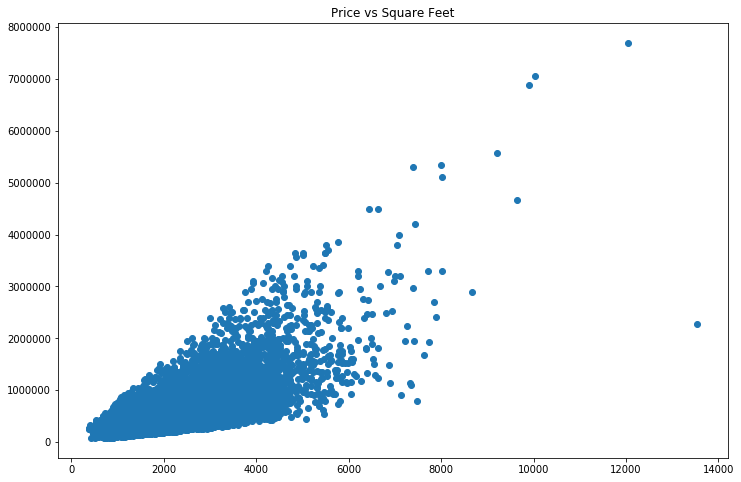

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(data.sqft_living,data.price)
plt.title("Price vs Square Feet")
plt.rcParams.update({'font.size': 22})
plt.savefig('images/pricetosqftliving.png')

### As the "sqft_living" increases 'price' increases.  However a 3,000 square feet house can range from $355,000 to  $2,400,000. ### 

In [17]:
#to eliminate the one outlier with 33 bedrooms and graph the number of bedrooms
df_bedrooms = data[data['bedrooms']<15]
df_bedrooms.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


### This visual is to understand how price moves as number of bedrooms increase the price hardly changes.  The price variance is not explained well by the number of bedrooms. ###

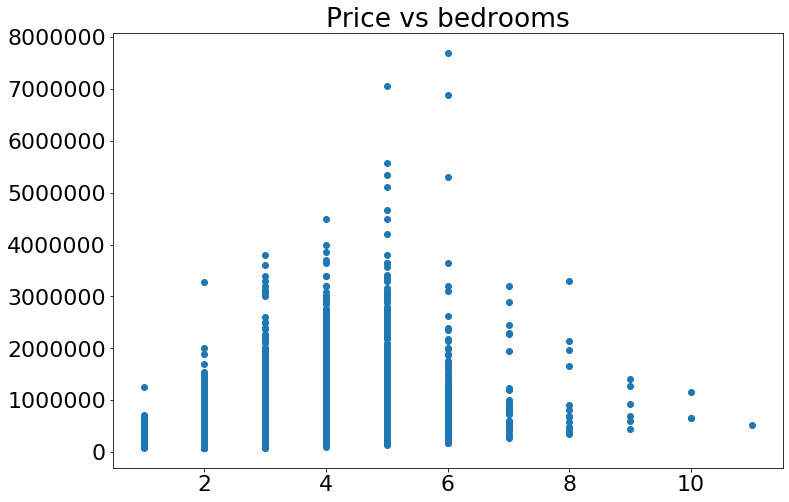

In [18]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.scatter(df_bedrooms.bedrooms,df_bedrooms.price)
plt.title("Price vs bedrooms")
plt.savefig('images/pricetobedrooms.png')
#plt.xticks(rotation=90)

In [19]:
# To find number of houses in $350,000 and $650,000
len(data[data['price']>350000]),len(data[data['price']>650000]),len(data[data['price']>4000000])


(14811, 5205, 11)

In [20]:
# to find houses more than 7million
df_pricemax = data[data['price']>7000000]
df_pricemax.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001,98004,47.6500,-122.214,3930,25449
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987,98102,47.6298,-122.323,3940,8800


In [21]:
#To find bedrooms info about bedroom
df_bedrooms = data[data['bedrooms']<15]
df_bedrooms.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


### To understand the number of bedroom in the houses sold ###

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

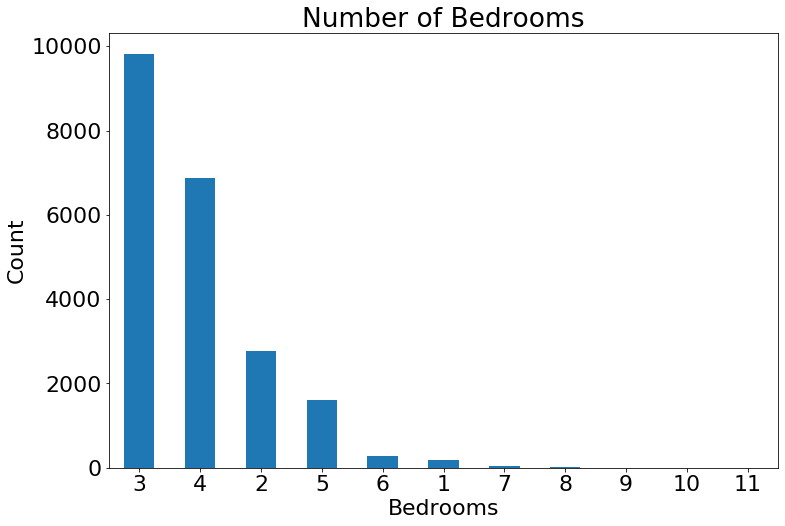

In [22]:
plt.figure(figsize=(12,8))
df_bedrooms['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.rcParams.update({'font.size': 22})
plt.xticks(rotation=360)
plt.savefig('images/bedroomscount.png')
sns.despine

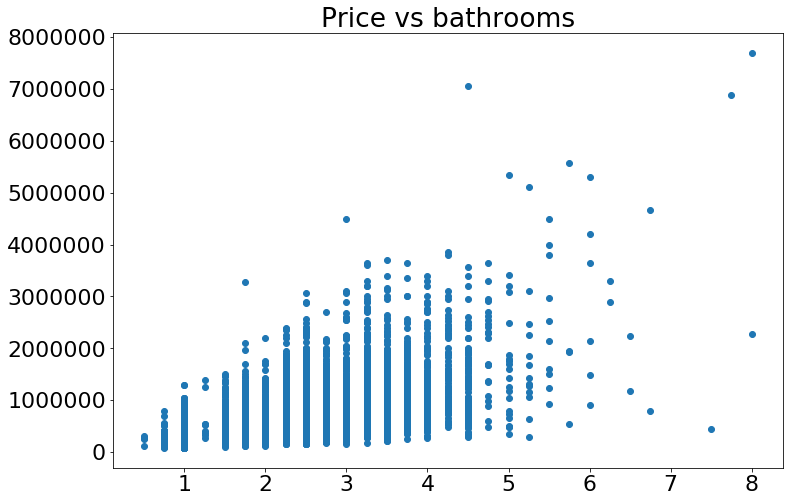

In [23]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.scatter(data.bathrooms,data.price)
plt.title("Price vs bathrooms")
plt.savefig('images/pricetobathrooms.png')
#plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

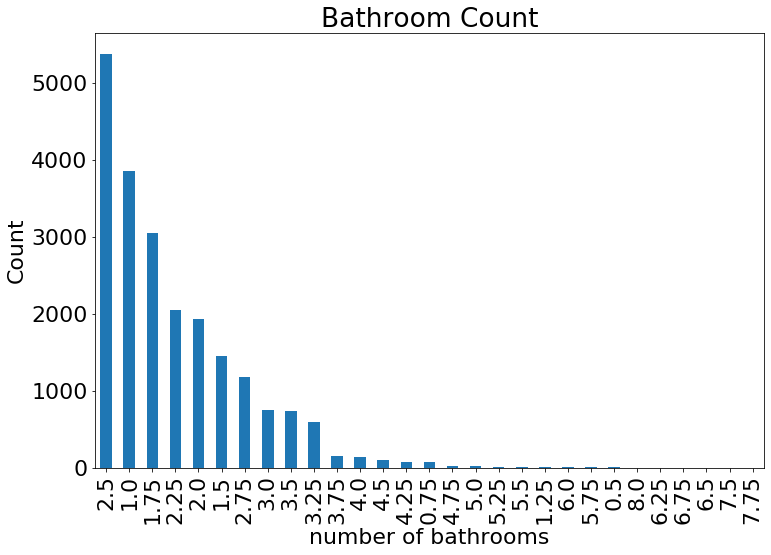

In [24]:
plt.figure(figsize=(12,8))
data['bathrooms'].value_counts().plot(kind='bar')
plt.title('Bathroom Count')
plt.xlabel('number of bathrooms')
plt.ylabel('Count')
plt.savefig('images/bathroomscount.png')
plt.xticks(rotation=90)
#sns.despine

In [25]:
data.bathrooms.value_counts(normalize=True)

2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.003287
4.75    0.001065
5.00    0.000972
5.25    0.000602
5.50    0.000463
1.25    0.000417
6.00    0.000278
5.75    0.000185
0.50    0.000185
8.00    0.000093
6.25    0.000093
6.75    0.000093
6.50    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64

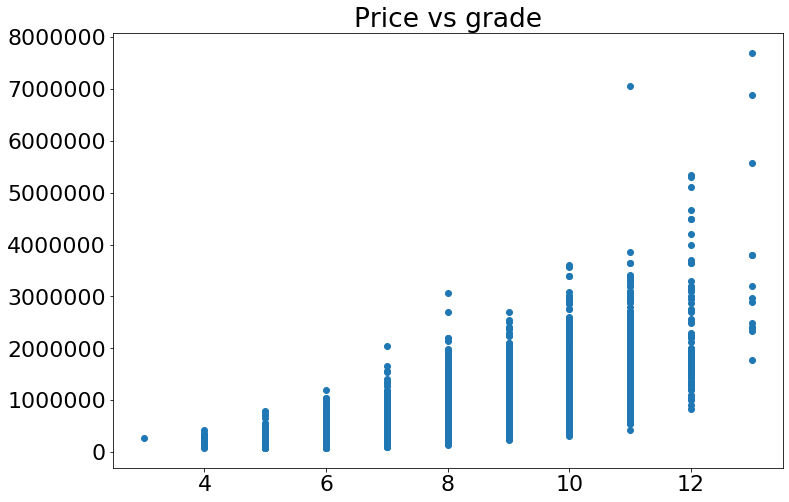

In [26]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))
plt.scatter(data.grade,data.price)
plt.title("Price vs grade")
plt.savefig('images/pricetograde.png')
#plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

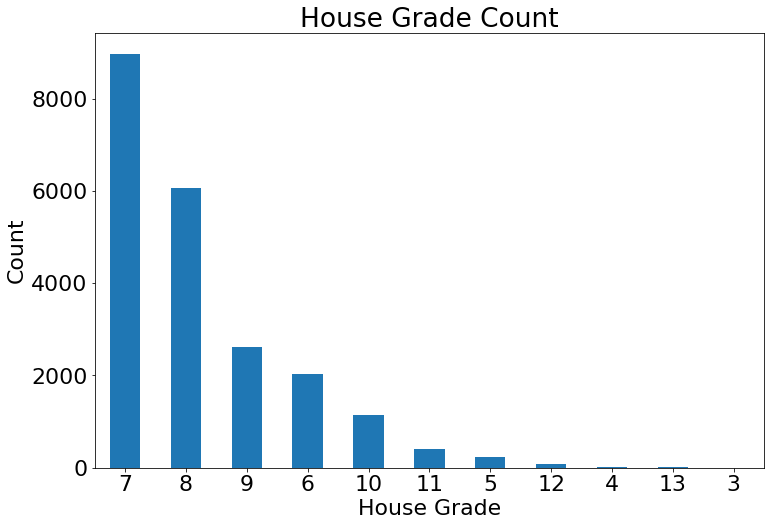

In [27]:
plt.figure(figsize=(12,8))
data['grade'].value_counts().plot(kind='bar')
plt.title('House Grade Count')
plt.xlabel('House Grade')
plt.ylabel('Count')
plt.savefig('images/gradecount.png')
plt.xticks(rotation=360)
#sns.despine


In [28]:
df_price = data[data["price"] <= 2000000]
df_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000., 2250000.]),
 <a list of 11 Text xticklabel objects>)

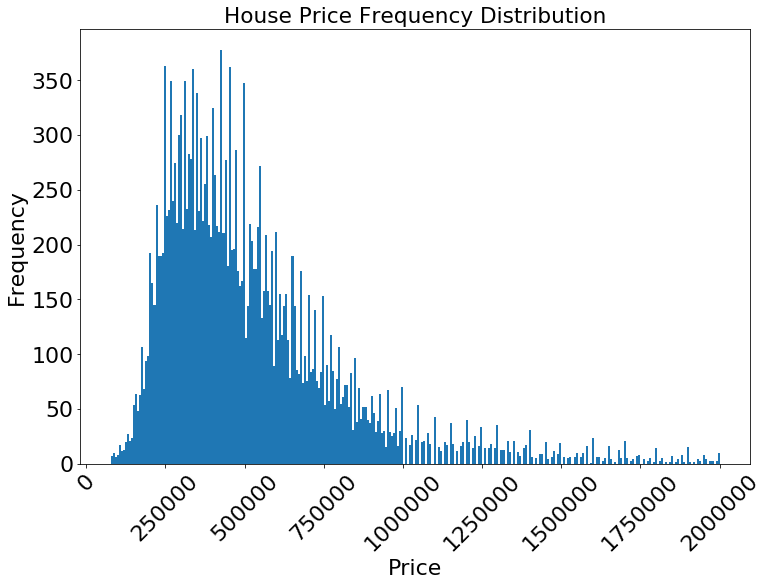

In [29]:
plt.figure(figsize=(12,8))
plt.hist('price',data=df_price,bins=300)
plt.rcParams.update({'font.size': 18})
plt.title('House Price Frequency Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

In [30]:
len(data[data['price']>1000000]), len(data[data['price']>2000000])

(1458, 198)

In [31]:
price_range_350_650=(len(data[data['price']>350000]))-(len(data[data['price']>650000]))
price_range_350_650

9606

In [32]:
data.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


# Base Model Work-up #

In [244]:
y = data['price']
X = data.drop('price', axis=1)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [246]:
X_train = X_train.drop(columns=['id','zipcode','date'],axis=1)

In [247]:
X_test = X_test.drop(columns=['id','zipcode','date'],axis=1)

In [248]:
X_train_num = X_train.select_dtypes(exclude='object')

In [249]:
X_test_num = X_test.select_dtypes(exclude='object')

In [250]:
corr = X_train_num.corr()

In [251]:
#abs(corr>.70)

In [252]:
# Im dropping features to reduce multicollinearity
X_train_num = X_train.drop(columns=['sqft_above','sqft_living15','sqft_lot15','waterfront','yr_renovated','long'], axis=1)

In [253]:
X_test_num = X_test.drop(columns=['sqft_above','sqft_living15','sqft_lot15','waterfront','yr_renovated','long'], axis=1)

### Scaling ###

In [254]:
ss = StandardScaler()
column_names = X_train_num.columns
index_names = X_train_num.index

X_train_num = pd.DataFrame(ss.fit_transform(X_train_num))

X_train_num.columns = column_names
X_train_num.index = index_names

In [255]:
column_names = X_test_num.columns
index_names = X_test_num.index

X_test_num = pd.DataFrame(ss.transform(X_test_num))

X_test_num.columns = column_names
X_test_num.index = index_names

In [256]:
#X_train_num.info()

In [257]:
y_train_num = y_train

In [258]:
y_test_num = y_test

In [259]:
#X_train_num.head()

In [260]:
lr = LinearRegression()
lr.fit(X_train_num, y_train_num)
lr.score(X_train_num, y_train_num)

0.6801316333635699

In [261]:
lr.score(X_test_num, y_test_num)

0.6662330021997607

In [262]:
X_train_num= X_train_num[(np.abs(X_train_num)<2.5).all(axis=1)]

In [263]:
X_test_num = X_test_num[(np.abs(X_test_num)<2.5).all(axis=1)]

In [264]:
y_train_num = y_train_num[y_train_num.index.isin(X_train_num.index)]

In [265]:
y_test_num = y_test_num[y_test_num.index.isin(X_test_num.index)]

## Test and Train Linear Regression Score for Base Model ##

In [266]:
lr = LinearRegression()
lr.fit(X_train_num, y_train_num)
print("Training R squared " + str(lr.score(X_train_num, y_train_num)))

Training R squared 0.6485557376927611


In [267]:
print("Test R Squared " +str(lr.score(X_test_num, y_test_num)))

Test R Squared 0.6380765260576114


In [268]:
# We can now look at our coeficients.  
list(zip(lr.coef_, X_train_num.columns))

[(-16668.816939684115, 'bedrooms'),
 (25907.280813635938, 'bathrooms'),
 (121135.70279635623, 'sqft_living'),
 (-18851.111708481836, 'sqft_lot'),
 (10304.326325670809, 'floors'),
 (31917.376757942366, 'view'),
 (18988.83493440495, 'condition'),
 (116599.57679043252, 'grade'),
 (-10148.336318502981, 'sqft_basement'),
 (-72628.25438779953, 'yr_built'),
 (75542.33907857671, 'lat')]

### Sqft_living is the biggest contributor to the House Sale Price according to the above lr coeficients ###

In [269]:
# We can now look at our coeficients.  
list(zip(lr.coef_, X_test_num.columns))

[(-16668.816939684115, 'bedrooms'),
 (25907.280813635938, 'bathrooms'),
 (121135.70279635623, 'sqft_living'),
 (-18851.111708481836, 'sqft_lot'),
 (10304.326325670809, 'floors'),
 (31917.376757942366, 'view'),
 (18988.83493440495, 'condition'),
 (116599.57679043252, 'grade'),
 (-10148.336318502981, 'sqft_basement'),
 (-72628.25438779953, 'yr_built'),
 (75542.33907857671, 'lat')]

## Test and Train Model Summaries for base model ##


In [271]:
formulatrnb = 'price ~ ' + '+'.join(X_train_num.columns)
df_train = X_train_num.join(y_train_num)
mod1trn = smf.ols(formula=formulatrnb, data = df_train)
res1trn = mod1trn.fit()
res1trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2163.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:05   Log-Likelihood:            -1.7182e+05
No. Observations:               12907   AIC:                         3.437e+05
Df Residuals:                   12895   BIC:                         3.438e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.214e+05   1473.554    353.850      0.000    5.19e+05    5.24e+05
bedrooms      -1.667e+04   1905.789     -8.746      0.000   -2.04e+04   -1.29e+04
bathrooms      2.591e+04   2548.342     10.166      0.000    2.09e+04    3.09e+04
sqft_living    1.211e+05   3376.048     35.881      0.000    1.15e+05    1.28e+05
sqft_lot      -1.885e+04   4570.011     -4.125      0.000   -2.78e+04   -9893.215
floors          1.03e+04   2172.169      4.744      0.000    6046.553    1.46e+04
view           3.192e+04   2562.038     12.458      0.000    2.69e+04    3.69e+04
condition      1.899e+04   1415.709     13.413      0.000    1.62e+04    2.18e+04
grade          1.166e+05   2445.480     47.680      0.000    1.12e+05    1.21e+05
sqft_basement -1.015e+04   2022.774     -5.017      0.000   -1.41e+04   -6183.400
yr_built      -7.263e+04   1822.002    -39.862      0.000   -7.62e+04   -6.91e+04
lat            7.554e+04   1373.217     55.011      0.000    7.29e+04    7.82e+04
==============================================================================
Omnibus:                     6414.367   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79165.925
Skew:                           2.087   Prob(JB):                         0.00
Kurtosis:                      14.392   Cond. No.                         6.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
import statsmodels.formula.api as smf
formulatstb = 'price ~ ' + '+'.join(X_test_num.columns)
df_test = X_test_num.join(y_test_num)
mod1tst = smf.ols(formula=formulatstb, data = df_test)
res1tst = mod1tst.fit()
res1tst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     894.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:06   Log-Likelihood:                -73980.
No. Observations:                5551   AIC:                         1.480e+05
Df Residuals:                    5539   BIC:                         1.481e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.248e+05   2314.244    226.751      0.000     5.2e+05    5.29e+05
bedrooms      -1.734e+04   2991.444     -5.798      0.000   -2.32e+04   -1.15e+04
bathrooms      3.333e+04   3924.289      8.493      0.000    2.56e+04     4.1e+04
sqft_living    1.284e+05   5218.972     24.597      0.000    1.18e+05    1.39e+05
sqft_lot      -1.606e+04   7521.311     -2.136      0.033   -3.08e+04   -1317.175
floors         3269.1763   3323.905      0.984      0.325   -3246.982    9785.335
view           4.253e+04   3754.969     11.326      0.000    3.52e+04    4.99e+04
condition      1.564e+04   2209.562      7.077      0.000    1.13e+04       2e+04
grade          1.098e+05   3730.269     29.426      0.000    1.02e+05    1.17e+05
sqft_basement -1.694e+04   3095.093     -5.472      0.000    -2.3e+04   -1.09e+04
yr_built      -6.961e+04   2879.784    -24.171      0.000   -7.53e+04    -6.4e+04
lat            7.739e+04   2114.472     36.602      0.000    7.32e+04    8.15e+04
==============================================================================
Omnibus:                     2928.683   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43292.332
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      15.968   Cond. No.                         6.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Feature Engineering add sqft_living/bedrooms #

I am trying to a add the Sqft_living/bedrooms feature to improve my R2. 
Model 2

In [273]:
ss = StandardScaler()
X_train_sqft_lvbr = X_train_num.copy()
X_train_sqft_lvbr['sqftlvbr']=X_train_sqft_lvbr['sqft_living']/X_train_sqft_lvbr['bedrooms']
X_train_sqft_lvbr['sqftlvbr'] = ss.fit_transform(np.array(X_train_sqft_lvbr['sqftlvbr']).reshape(-1,1))

In [274]:
X_test_sqft_lvbr = X_test_num.copy()
X_test_sqft_lvbr['sqftlvbr']=X_test_sqft_lvbr['sqft_living']/X_test_sqft_lvbr['bedrooms']
X_test_sqft_lvbr['sqftlvbr'] = ss.transform(np.array(X_test_sqft_lvbr['sqftlvbr']).reshape(-1,1))

In [275]:
X_train_sqft_lvbr = X_train_sqft_lvbr.join(y_train)

In [276]:
X_test_sqft_lvbr = X_test_sqft_lvbr.join(y_test)

In [277]:
X_train_sqft_lvbr =X_train_sqft_lvbr[(np.abs(X_train_sqft_lvbr['sqftlvbr'])<2.5)]

In [278]:
X_test_sqft_lvbr =X_test_sqft_lvbr[(np.abs(X_test_sqft_lvbr['sqftlvbr'])<2.5)]

In [279]:
y_train_sqft_lvbr = X_train_sqft_lvbr['price']

In [280]:
y_test_sqft_lvbr = X_test_sqft_lvbr['price']

In [281]:
X_train_sqft_lvbr.drop('price', axis=1, inplace=True)

In [282]:
X_test_sqft_lvbr.drop('price', axis=1, inplace=True)

In [283]:
#y_train_sqft_lvbr = y_train_sqft_lvbr[y_train_sqft_lvbr.index.isin(X_train_sqft_lvbr.index)]

## Test and Train R square for Model 2 ##

In [284]:
lr = LinearRegression()
lr.fit(X_train_sqft_lvbr, y_train_sqft_lvbr)
print("Train R Squared " +str(lr.score(X_train_sqft_lvbr, y_train_sqft_lvbr)))

Train R Squared 0.6507920973655017


In [285]:
print("Test R Squared " +str(lr.score(X_test_sqft_lvbr, y_test_sqft_lvbr)))

Test R Squared 0.6450209385608814


In [286]:
list(zip(lr.coef_, X_train_sqft_lvbr.columns))

[(-15106.840588475, 'bedrooms'),
 (27986.448752422188, 'bathrooms'),
 (119031.97238547151, 'sqft_living'),
 (-11797.116092330203, 'sqft_lot'),
 (13448.300827724852, 'floors'),
 (33273.199833477345, 'view'),
 (18932.606841933743, 'condition'),
 (114990.35629660846, 'grade'),
 (-7201.4746600767985, 'sqft_basement'),
 (-73093.48556719473, 'yr_built'),
 (74868.87277790681, 'lat'),
 (16319.488810979072, 'sqftlvbr')]

In [287]:
formulatrsqft_lvbr = 'price ~ ' + '+'.join(X_train_sqft_lvbr.columns)
X_train_sqft_lvbr = X_train_sqft_lvbr.join(y_train_sqft_lvbr)
mod2trn = smf.ols(formula=formulatrsqft_lvbr, data = X_train_sqft_lvbr)
res2trn = mod2trn.fit()
res2trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1966.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:24   Log-Likelihood:            -1.6826e+05
No. Observations:               12670   AIC:                         3.365e+05
Df Residuals:                   12657   BIC:                         3.366e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.216e+05   1466.751    355.630      0.000    5.19e+05    5.24e+05
bedrooms      -1.511e+04   1912.888     -7.897      0.000   -1.89e+04   -1.14e+04
bathrooms      2.799e+04   2501.649     11.187      0.000    2.31e+04    3.29e+04
sqft_living     1.19e+05   3406.283     34.945      0.000    1.12e+05    1.26e+05
sqft_lot       -1.18e+04   4584.000     -2.574      0.010   -2.08e+04   -2811.783
floors         1.345e+04   2137.259      6.292      0.000    9258.949    1.76e+04
view           3.327e+04   2553.039     13.033      0.000    2.83e+04    3.83e+04
condition      1.893e+04   1379.672     13.723      0.000    1.62e+04    2.16e+04
grade           1.15e+05   2408.233     47.749      0.000     1.1e+05     1.2e+05
sqft_basement -7201.4747   2018.271     -3.568      0.000   -1.12e+04   -3245.359
yr_built      -7.309e+04   1785.519    -40.937      0.000   -7.66e+04   -6.96e+04
lat            7.487e+04   1341.042     55.829      0.000    7.22e+04    7.75e+04
sqftlvbr       1.632e+04   1462.591     11.158      0.000    1.35e+04    1.92e+04
==============================================================================
Omnibus:                     5870.947   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64703.962
Skew:                           1.942   Prob(JB):                         0.00
Kurtosis:                      13.367   Cond. No.                         6.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
formulatssqftlvbr= 'price ~ ' + '+'.join(X_test_sqft_lvbr.columns)
X_test_sqft_lvbr = X_test_sqft_lvbr.join(y_test_sqft_lvbr)
mod2tst = smf.ols(formula=formulatssqftlvbr, data = X_test_sqft_lvbr)
res2tst = mod2tst.fit()
res2tst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     833.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:25   Log-Likelihood:                -72632.
No. Observations:                5462   AIC:                         1.453e+05
Df Residuals:                    5449   BIC:                         1.454e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.271e+05   2307.128    228.478      0.000    5.23e+05    5.32e+05
bedrooms      -1.846e+04   3001.296     -6.150      0.000   -2.43e+04   -1.26e+04
bathrooms       3.38e+04   3861.656      8.753      0.000    2.62e+04    4.14e+04
sqft_living     1.33e+05   5258.034     25.292      0.000    1.23e+05    1.43e+05
sqft_lot      -7400.7036   7555.314     -0.980      0.327   -2.22e+04    7410.731
floors         6704.1318   3272.154      2.049      0.041     289.403    1.31e+04
view           4.521e+04   3720.945     12.150      0.000    3.79e+04    5.25e+04
condition      1.549e+04   2156.944      7.184      0.000    1.13e+04    1.97e+04
grade          1.067e+05   3681.451     28.991      0.000    9.95e+04    1.14e+05
sqft_basement -1.284e+04   3097.041     -4.146      0.000   -1.89e+04   -6769.378
yr_built      -7.003e+04   2824.137    -24.796      0.000   -7.56e+04   -6.45e+04
lat            7.772e+04   2067.766     37.586      0.000    7.37e+04    8.18e+04
sqftlvbr       1.888e+04   2282.195      8.272      0.000    1.44e+04    2.34e+04
==============================================================================
Omnibus:                     2629.914   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32359.533
Skew:                           1.989   Prob(JB):                         0.00
Kurtosis:                      14.241   Cond. No.                         6.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Engineering 'sqft_living/bathrooms' ##

### I am testing this feature to explore the if the sqft/bathrooms will improve my R-square. ###

In [289]:
Xtr_Mod3 = X_train_num.copy()

In [290]:
Xtst_Mod3 = X_test_num.copy()

In [291]:
ss = StandardScaler()
Xtr_Mod3['sqftlv_bath']= Xtr_Mod3['sqft_living']/Xtr_Mod3['bathrooms']
Xtr_Mod3['sqftlv_bath'] = ss.fit_transform(np.array(Xtr_Mod3['sqftlv_bath']).reshape(-1,1))

In [292]:

Xtst_Mod3['sqftlv_bath']= Xtst_Mod3['sqft_living']/Xtst_Mod3['bathrooms']
Xtst_Mod3['sqftlv_bath'] = ss.fit_transform(np.array(Xtst_Mod3['sqftlv_bath']).reshape(-1,1))

In [293]:
Xtr_Mod3 = Xtr_Mod3.join(y_train)

In [294]:
Xtst_Mod3 = Xtst_Mod3.join(y_test)

In [295]:
Xtr_Mod3 =Xtr_Mod3[(np.abs(Xtr_Mod3['sqftlv_bath'])<2.5)]

In [296]:
Xtst_Mod3 =Xtst_Mod3[(np.abs(Xtst_Mod3['sqftlv_bath'])<2.5)]

In [297]:
ytr_Mod3 = Xtr_Mod3['price']

In [298]:
ytst_Mod3 = Xtst_Mod3['price']

In [299]:
Xtr_Mod3.drop('price', axis=1, inplace=True)

In [300]:
Xtst_Mod3.drop('price', axis=1, inplace=True)

## Test and Train R square for Model 3  #

In [301]:
lr = LinearRegression()
lr.fit(Xtr_Mod3, ytr_Mod3)
print("Train R Squared " +str(lr.score(Xtr_Mod3, ytr_Mod3)))

Train R Squared 0.6481652853396892


In [302]:
print("Test R Squared " +str(lr.score(Xtst_Mod3, ytst_Mod3)))

Test R Squared 0.6389162816651637


In [303]:
formulatrsqftlvbath= 'price ~ ' + '+'.join(Xtr_Mod3.columns)
Xtr_Mod3 = Xtr_Mod3.join(ytr_Mod3)
mod3tr = smf.ols(formula=formulatrsqftlvbath, data = Xtr_Mod3)
res3tr = mod3tr.fit()
res3tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1895.
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:39   Log-Likelihood:            -1.6436e+05
No. Observations:               12357   AIC:                         3.288e+05
Df Residuals:                   12344   BIC:                         3.288e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.202e+05   1491.217    348.865      0.000    5.17e+05    5.23e+05
bedrooms      -1.485e+04   1924.938     -7.713      0.000   -1.86e+04   -1.11e+04
bathrooms      2.725e+04   2620.442     10.399      0.000    2.21e+04    3.24e+04
sqft_living    1.199e+05   3611.137     33.217      0.000    1.13e+05    1.27e+05
sqft_lot      -1.823e+04   4606.150     -3.957      0.000   -2.73e+04   -9197.031
floors         9025.9321   2268.092      3.980      0.000    4580.118    1.35e+04
view           3.275e+04   2584.370     12.674      0.000    2.77e+04    3.78e+04
condition      1.905e+04   1432.009     13.304      0.000    1.62e+04    2.19e+04
grade          1.147e+05   2476.334     46.331      0.000     1.1e+05     1.2e+05
sqft_basement -1.159e+04   2123.283     -5.458      0.000   -1.58e+04   -7426.797
yr_built      -7.208e+04   1857.790    -38.799      0.000   -7.57e+04   -6.84e+04
lat            7.565e+04   1386.510     54.560      0.000    7.29e+04    7.84e+04
sqftlv_bath    4370.8127   1932.274      2.262      0.024     583.255    8158.371
==============================================================================
Omnibus:                     6120.011   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76713.708
Skew:                           2.071   Prob(JB):                         0.00
Kurtosis:                      14.482   Cond. No.                         6.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
formulatssqftlvbath= 'price ~ ' + '+'.join(Xtst_Mod3.columns)
Xtst_Mod3 = Xtst_Mod3.join(ytst_Mod3)
mod3tst = smf.ols(formula=formulatssqftlvbath, data = Xtst_Mod3)
res3tst = mod3tst.fit()
res3tst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     786.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:49:40   Log-Likelihood:                -70547.
No. Observations:                5299   AIC:                         1.411e+05
Df Residuals:                    5286   BIC:                         1.412e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       5.23e+05   2341.236    223.373      0.000    5.18e+05    5.28e+05
bedrooms      -1.752e+04   3014.300     -5.812      0.000   -2.34e+04   -1.16e+04
bathrooms      3.623e+04   4019.179      9.013      0.000    2.83e+04    4.41e+04
sqft_living    1.271e+05   5559.233     22.872      0.000    1.16e+05    1.38e+05
sqft_lot      -1.468e+04   7621.382     -1.926      0.054   -2.96e+04     259.433
floors          206.9734   3450.987      0.060      0.952   -6558.386    6972.333
view           4.307e+04   3766.725     11.433      0.000    3.57e+04    5.04e+04
condition      1.521e+04   2227.881      6.827      0.000    1.08e+04    1.96e+04
grade          1.079e+05   3774.148     28.585      0.000       1e+05    1.15e+05
sqft_basement -1.826e+04   3237.242     -5.640      0.000   -2.46e+04   -1.19e+04
yr_built      -6.893e+04   2929.330    -23.532      0.000   -7.47e+04   -6.32e+04
lat            7.855e+04   2134.283     36.805      0.000    7.44e+04    8.27e+04
sqftlv_bath    1735.9500   2989.246      0.581      0.561   -4124.206    7596.106
==============================================================================
Omnibus:                     2732.125   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38740.263
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                      15.545   Cond. No.                         6.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 4 - Polynomial Feature #

### I added this feature to further improve my R2 ###

In [305]:
X_trMod4 = X_train_num.copy()
y_trMod4 = y_train

In [306]:
y_trMod4 = y_trMod4[y_trMod4.index.isin(X_trMod4.index)]

In [307]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2, include_bias=False)

poly_df = pd.DataFrame(pf.fit_transform(X_trMod4))
poly_df.columns = pf.get_feature_names(X_trMod4.columns)
poly_df.head()

lr.fit(poly_df, y_trMod4)
lr.score(poly_df, y_trMod4)

0.7221905978652657

In [308]:
X_tstMod4 = X_test_num.copy()
y_tstMod4 = y_test

In [309]:
y_tstMod4 = y_tstMod4[y_tstMod4.index.isin(X_tstMod4.index)]

In [310]:
pf = PolynomialFeatures(2, include_bias=False)

poly_df = pd.DataFrame(pf.fit_transform(X_tstMod4))
poly_df.columns = pf.get_feature_names(X_tstMod4.columns)
poly_df.head()

lr.score(poly_df, y_tstMod4)


0.7058884462592719

### Final Analysis:  Due to the limitation of the data from the kitchen, family room, and open lots availability.  I would like to do more research in the area based on those factors and house price sales around the open lots and fine tune my recommendations accordingly. ###
